In [22]:
# test script.
# want to make sure that when loading feature class to geodatframe, that the desired CRS is getting used

import geopandas as gpd
import arcpy
import rasterio

from utils import esri_to_df

fc_2226 = r'\\data-svr\GIS\Projects\Darren\PPA3_GIS\PPA3Testing.gdb\Test_I5SMF'
fc_3857 = r'\\data-svr\GIS\Projects\Darren\PPA3_GIS\PPA3Testing.gdb\Test_I5SMF_3857'

tifpath = r"\\Arcserverppa-svr\PPA_SVR\PPA_03_01\PPA3_GIS_SVR\access_tif\pop2020.tif"

target_crs = 'EPSG:3857'

# load tif
tifdata = rasterio.open(tifpath)
tifcrs = tifdata.crs
    

# loading 2226 gdf using crs_val=target
gdf1 = esri_to_df(esri_obj_path=fc_2226, include_geom=True, field_list=None, index_field=None, 
                    crs_val=target_crs, dissolve=False)

# loading 2226 gdf using crs_val = original crs of feature class, then using to_crs() to set crs=target
crs_2226_code = arcpy.Describe(fc_2226).spatialReference.factoryCode
crs_2226 = f"EPSG:{crs_2226_code}"
gdf2 = esri_to_df(esri_obj_path=fc_2226, include_geom=True, field_list=None, index_field=None, 
                    crs_val=crs_2226, dissolve=False).to_crs(target_crs)

# loading web mercator version of same line
gdf3 = esri_to_df(esri_obj_path=fc_3857, include_geom=True, field_list=None, index_field=None, 
                    crs_val=target_crs, dissolve=False)

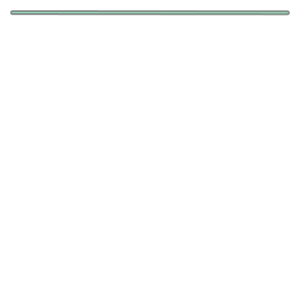

In [36]:
gdf2['geometry'][0].buffer(30)

In [31]:
gdf2.geometry.length

0    5451.623382
dtype: float64

In [ ]:
gdf2['geometry'][0]